This is the new baselineModel with indication light inputs.

In [1]:
# --- Imports ---
import numpy as np                          # Numerical operations and array handling
import matplotlib.pyplot as plt             # For plotting graphs and images
from sklearn.linear_model import Ridge      # Ridge regression (L2-regularized linear regression)
from sklearn.metrics import mean_squared_error, r2_score  # Model evaluation metrics
from sklearn.model_selection import train_test_split      # Splits dataset into train and test sets

In [2]:
# --- Load Data ---
# Assumes:
# - modelName_images.npy: shape (N, H, W), N grayscale images of size HxW (e.g., 80x60)
# - modelName_angles.npy: shape (N,), N real-valued steering angles in range [-1, 1]
# - modelName_turn_signals.npy: shape (N,), N values in set {-1, 0, 1}

images = np.load("../output/extra_large_images.npy")   # e.g., shape (1000, 80, 60)
images = images / 255.0
angles = np.load("../output/extra_large_angles.npy")   # e.g., shape (1000,)
indications = np.load("../output/extra_large_turn_signals.npy")


print(f"Loaded {images.shape[0]} samples. Image shape: {images.shape[1:]}")

Loaded 8999 samples. Image shape: (120, 160)


In [3]:
# --- Preprocessing ---

# Flatten 2D images into 1D feature vectors for linear regression
# Reshape from (N, 160, 120) -> (N, 19200)
X = images.reshape(len(images), -1)

# --- Add indication_lights as additional feature ---
# Reshape to (N, 1) to concatenate with image vectors
indications = indications.reshape(-1, 1)

# Concatenate image data and indications: (N, 19200 + 1)
X = np.hstack((X, indications))

# Target values (steering angles)
y = angles

# Split into 80% training and 20% testing data
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [4]:
# Ridge Regression helps prevent overfitting by penalizing large weights (L2 regularization)
model1 = Ridge(alpha=80000)  # Alpha is the regularization strength
model1.fit(X_train, y_train)  # Fit model1 to training data

# --- Evaluate model1 on Test Data ---
y_pred = model1.predict(X_test)  # Predict on unseen data

mse = mean_squared_error(y_test, y_pred)  # Measures average squared error
r2 = r2_score(y_test, y_pred)             # Measures how well predictions fit (1.0 is perfect)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# --- Plot Learning Curve ---
# This shows how training size affects performance

model1_train_sizes = np.linspace(0.1, 1.0, 10)  # 10 sizes between 10% and 100% of training data
model1_train_errors = []
model1_test_errors = []

for frac in model1_train_sizes:
    idx = int(frac * len(X_train))  # Number of training samples for current fraction
    model1.fit(X_train[:idx], y_train[:idx])  # Retrain model1 on subset
    train_pred = model1.predict(X_train[:idx])
    test_pred = model1.predict(X_test)
    
    # Store errors for plotting
    model1_train_errors.append(mean_squared_error(y_train[:idx], train_pred))
    model1_test_errors.append(mean_squared_error(y_test, test_pred))


Mean Squared Error: 0.0036
R² Score: 0.0974


In [5]:
# Ridge Regression helps prevent overfitting by penalizing large weights (L2 regularization)
model2 = Ridge(alpha=1000)  # Alpha is the regularization strength
model2.fit(X_train, y_train)  # Fit model2 to training data

# --- Evaluate model2 on Test Data ---
y_pred = model2.predict(X_test)  # Predict on unseen data

mse = mean_squared_error(y_test, y_pred)  # Measures average squared error
r2 = r2_score(y_test, y_pred)             # Measures how well predictions fit (1.0 is perfect)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# --- Plot Learning Curve ---
# This shows how training size affects performance

model2_train_sizes = np.linspace(0.1, 1.0, 10)  # 10 sizes between 10% and 100% of training data
model2_train_errors = []
model2_test_errors = []

for frac in model2_train_sizes:
    idx = int(frac * len(X_train))  # Number of training samples for current fraction
    model2.fit(X_train[:idx], y_train[:idx])  # Retrain model2 on subset
    train_pred = model2.predict(X_train[:idx])
    test_pred = model2.predict(X_test)
    
    # Store errors for plotting
    model2_train_errors.append(mean_squared_error(y_train[:idx], train_pred))
    model2_test_errors.append(mean_squared_error(y_test, test_pred))

Mean Squared Error: 0.0027
R² Score: 0.3269


In [6]:
# Ridge Regression helps prevent overfitting by penalizing large weights (L3 regularization)
model3 = Ridge(alpha=250)  # Alpha is the regularization strength
model3.fit(X_train, y_train)  # Fit model3 to training data

# --- Evaluate model3 on Test Data ---
y_pred = model3.predict(X_test)  # Predict on unseen data

mse = mean_squared_error(y_test, y_pred)  # Measures average squared error
r2 = r2_score(y_test, y_pred)             # Measures how well predictions fit (1.0 is perfect)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# --- Plot Learning Curve ---
# This shows how training size affects performance

model3_train_sizes = np.linspace(0.1, 1.0, 10)  # 10 sizes between 10% and 100% of training data
model3_train_errors = []
model3_test_errors = []

for frac in model3_train_sizes:
    idx = int(frac * len(X_train))  # Number of training samples for current fraction
    model3.fit(X_train[:idx], y_train[:idx])  # Retrain model3 on subset
    train_pred = model3.predict(X_train[:idx])
    test_pred = model3.predict(X_test)
    
    # Store errors for plotting
    model3_train_errors.append(mean_squared_error(y_train[:idx], train_pred))
    model3_test_errors.append(mean_squared_error(y_test, test_pred))

Mean Squared Error: 0.0026
R² Score: 0.3600


In [7]:
# Ridge Regression helps prevent overfitting by penalizing large weights (L4 regularization)
model4 = Ridge(alpha=100)  # Alpha is the regularization strength
model4.fit(X_train, y_train)  # Fit model4 to training data

# --- Evaluate model4 on Test Data ---
y_pred = model4.predict(X_test)  # Predict on unseen data

mse = mean_squared_error(y_test, y_pred)  # Measures average squared error
r2 = r2_score(y_test, y_pred)             # Measures how well predictions fit (1.0 is perfect)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# --- Plot Learning Curve ---
# This shows how training size affects performance

model4_train_sizes = np.linspace(0.1, 1.0, 10)  # 10 sizes between 10% and 100% of training data
model4_train_errors = []
model4_test_errors = []

for frac in model4_train_sizes:
    idx = int(frac * len(X_train))  # Number of training samples for current fraction
    model4.fit(X_train[:idx], y_train[:idx])  # Retrain model4 on subset
    train_pred = model4.predict(X_train[:idx])
    test_pred = model4.predict(X_test)
    
    # Store errors for plotting
    model4_train_errors.append(mean_squared_error(y_train[:idx], train_pred))
    model4_test_errors.append(mean_squared_error(y_test, test_pred))

Mean Squared Error: 0.0026
R² Score: 0.3558


In [8]:
# Ridge Regression helps prevent overfitting by penalizing large weights (L5 regularization)
model5 = Ridge(alpha=10)  # Alpha is the regularization strength
model5.fit(X_train, y_train)  # Fit model5 to training data

# --- Evaluate model5 on Test Data ---
y_pred = model5.predict(X_test)  # Predict on unseen data

mse = mean_squared_error(y_test, y_pred)  # Measures average squared error
r2 = r2_score(y_test, y_pred)             # Measures how well predictions fit (1.0 is perfect)

print(f"Mean Squared Error: {mse:.5f}")
print(f"R² Score: {r2:.5f}")

# --- Plot Learning Curve ---
# This shows how training size affects performance

model5_train_sizes = np.linspace(0.1, 1.0, 10)  # 10 sizes between 10% and 100% of training data
model5_train_errors = []
model5_test_errors = []

for frac in model5_train_sizes:
    idx = int(frac * len(X_train))  # Number of training samples for current fraction
    model5.fit(X_train[:idx], y_train[:idx])  # Retrain model5 on subset
    train_pred = model5.predict(X_train[:idx])
    test_pred = model5.predict(X_test)
    
    # Store errors for plotting
    model5_train_errors.append(mean_squared_error(y_train[:idx], train_pred))
    model5_test_errors.append(mean_squared_error(y_test, test_pred))

Mean Squared Error: 0.00285
R² Score: 0.28838


In [9]:
# Ridge Regression helps prevent overfitting by penalizing large weights (L6 regularization)
model6 = Ridge(alpha=1)  # Alpha is the regularization strength
model6.fit(X_train, y_train)  # Fit model6 to training data

# --- Evaluate model6 on Test Data ---
y_pred = model6.predict(X_test)  # Predict on unseen data

mse = mean_squared_error(y_test, y_pred)  # Measures average squared error
r2 = r2_score(y_test, y_pred)             # Measures how well predictions fit (1.0 is perfect)

print(f"Mean Squared Error: {mse:.6f}")
print(f"R² Score: {r2:.6f}")

# --- Plot Learning Curve ---
# This shows how training size affects performance

model6_train_sizes = np.linspace(0.1, 1.0, 10)  # 10 sizes between 10% and 100% of training data
model6_train_errors = []
model6_test_errors = []

for frac in model6_train_sizes:
    idx = int(frac * len(X_train))  # Number of training samples for current fraction
    model6.fit(X_train[:idx], y_train[:idx])  # Retrain model6 on subset
    train_pred = model6.predict(X_train[:idx])
    test_pred = model6.predict(X_test)
    
    # Store errors for plotting
    model6_train_errors.append(mean_squared_error(y_train[:idx], train_pred))
    model6_test_errors.append(mean_squared_error(y_test, test_pred))

Mean Squared Error: 0.003667
R² Score: 0.085035


In [10]:
# Plot the training and testing errors
def plot_training(train_sizes, train_errors, test_errors):
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_errors, label="Train MSE", marker='o')
    plt.plot(train_sizes, test_errors, label="Test MSE", marker='s')
    plt.xlabel("Training Set Size Fraction")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title("Learning Curve - Ridge Regression")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

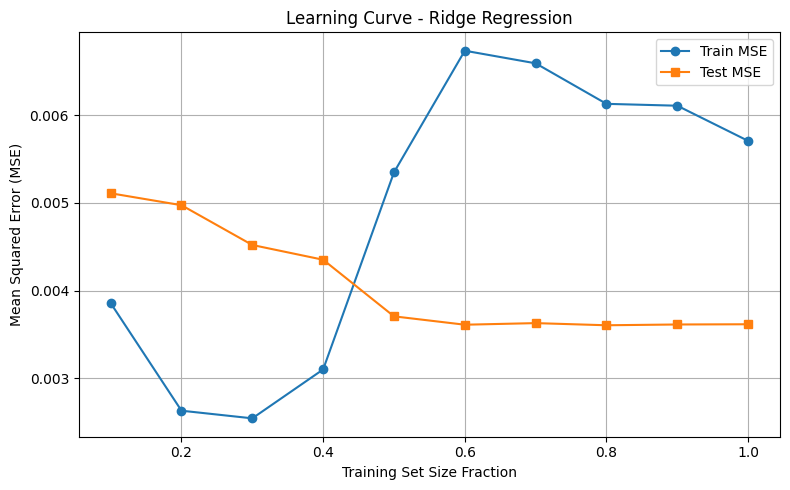

In [11]:
plot_training(model1_train_sizes, model1_train_errors, model1_test_errors)

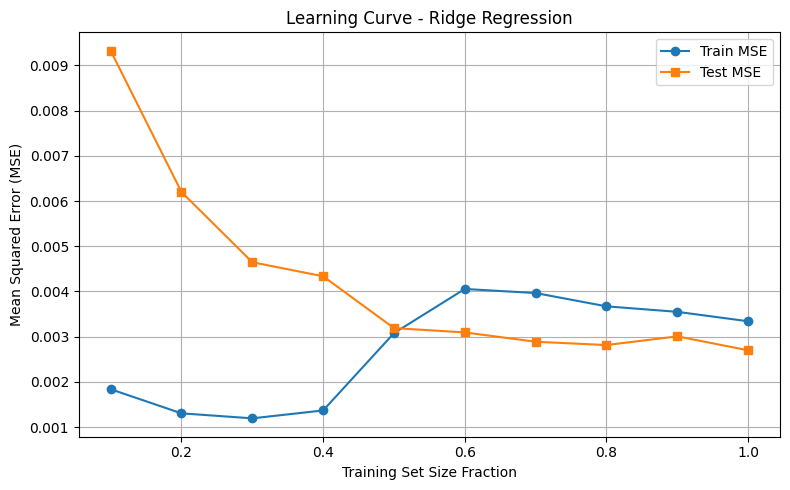

In [12]:
plot_training(model2_train_sizes, model2_train_errors, model2_test_errors)

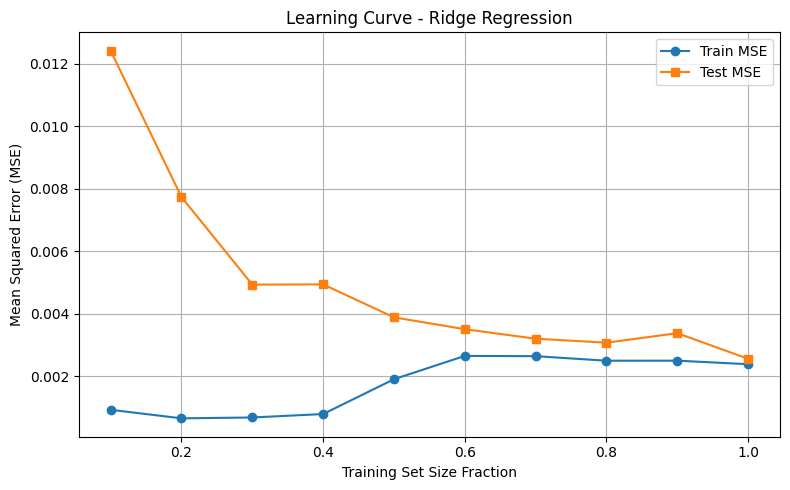

In [13]:
plot_training(model3_train_sizes, model3_train_errors, model3_test_errors)

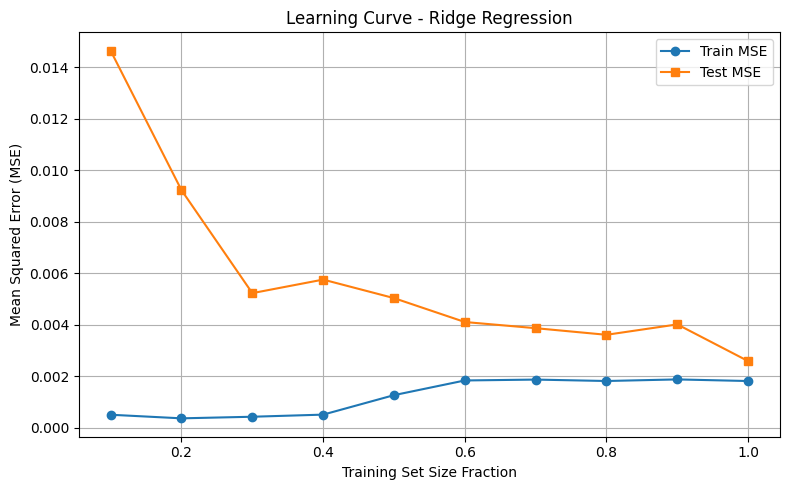

In [14]:
plot_training(model4_train_sizes, model4_train_errors, model4_test_errors)

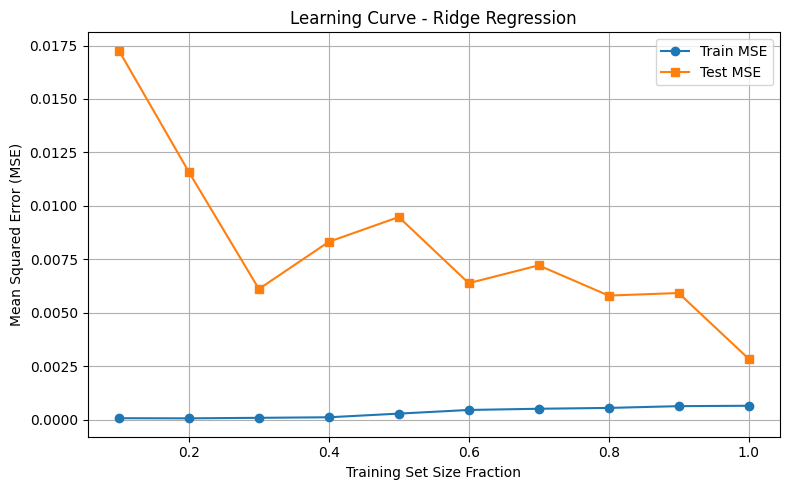

In [15]:
plot_training(model5_train_sizes, model5_train_errors, model5_test_errors)

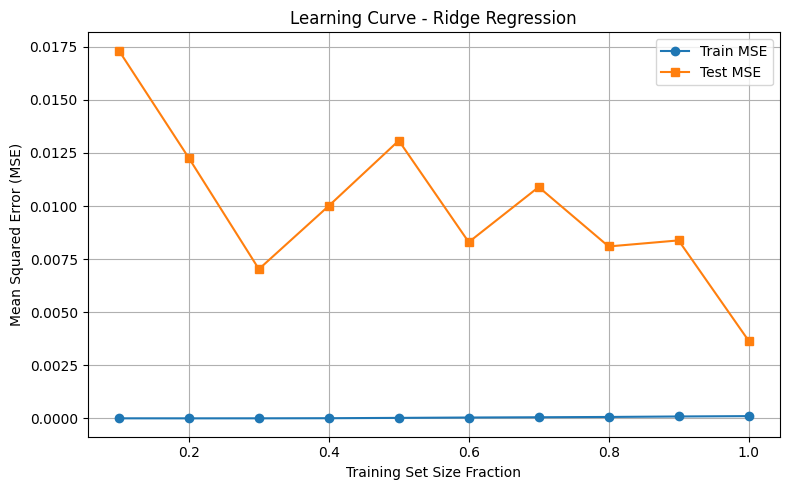

In [16]:
plot_training(model6_train_sizes, model6_train_errors, model6_test_errors)

In [17]:
# Saving the sklearn model
import joblib

joblib.dump(model4, "../output/baselineModel.pkl")


['../output/baselineModel.pkl']